In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

In [39]:
data_23 = pd.read_excel('data_23.xlsx')
data_24 = pd.read_excel('data_24.xlsx')

In [40]:
# lowercase
data_23 = data_23.apply(lambda x: x.astype(str).str.lower())
data_23.head()

,encrochat,exclu,ennetcom,sky,anom,ecli,zaaknummer,rechtbank,rechtsgebied,soort uitspraak,...,onderzoekswens,wrakingsverzoek,beslissing,straf_periode,straf_aantal,straf_in_dagen,vw_straf_periode,vw_straf_aantal,vw_straf_in_dagen,vrijspraak
0,1,0,0,0,0,ecli:nl:rbmne:2023:1595,16/133355-21 (ontneming),rechtbank midden-nederland,strafrecht,eerste aanleg - meervoudig,...,false,false,6beslissing de rechtbank: - stelt het bedr...,nan,nan,nan,nan,nan,nan,nan
1,121,0,0,0,0,ecli:nl:rblim:2022:558,03.271177.20 en 03.135736.20,rechtbank limburg,strafrecht,eerste aanleg - meervoudig,...,false,false,9de beslissing de rechtbank: bewezenverkla...,maand,42,1260.0,nan,nan,nan,nan
2,18,0,0,0,0,ecli:nl:rbdha:2022:7667,09-278272-21,rechtbank den haag,strafrecht,eerste aanleg - meervoudig,...,false,false,3de bewijsbeslissing 3.1. het standpunt van ...,maand,42,1260.0,nan,nan,nan,nan
3,1,0,0,0,0,ecli:nl:gharl:2023:1759,21-002300-22,gerechtshof arnhem-leeuwarden,strafrecht,hoger beroep,...,false,false,beslissing het hof: vernietigt het vonnis...,week,4,28.0,nan,nan,nan,nan
4,2,0,0,1,0,ecli:nl:rbmne:2021:3965,16/257655-20 (p),rechtbank midden-nederland,strafrecht,eerste aanleg - meervoudig,...,false,false,11beslissing de rechtbank: bewezenverkla...,jaar,6,2190.0,nan,nan,nan,nan


In [41]:
data_24 = data_24.apply(lambda x: x.astype(str).str.lower())
data_24.head()

,encrochat,exclu,ennetcom,sky,anom,ecli,zaaknummer,rechtbank,rechtsgebied,soort uitspraak,...,onderzoekswens,wrakingsverzoek,beslissing,straf_periode,straf_aantal,straf_in_dagen,vw_straf_periode,vw_straf_aantal,vw_straf_in_dagen,vrijspraak
0,1,0,0,0,0,ecli:nl:rbmne:2023:1595,16/133355-21 (ontneming),rechtbank midden-nederland,strafrecht,eerste aanleg - meervoudig,...,false,false,6beslissing de rechtbank: - stelt het bedr...,nan,nan,nan,nan,nan,nan,nan
1,1,0,0,0,0,ecli:nl:rbove:2024:1915,08.963573-21 (p),rechtbank overijssel,strafrecht,eerste aanleg - meervoudig,...,false,false,9de beslissing de rechtbank: bewezenverk...,maand,97,2910.0,nan,nan,nan,nan
2,0,0,0,2,0,ecli:nl:rbgel:2023:5422,05.323470.22,rechtbank gelderland,strafrecht,eerste aanleg - meervoudig,...,false,false,10de beslissing de rechtbank:  verklaart...,jaar,4.5,1642.5,nan,nan,nan,nan
3,0,0,0,0,0,ecli:nl:rbzwb:2024:1254,02-133243-23,rechtbank zeeland-west-brabant,strafrecht,op tegenspraak,...,false,false,5de beslissing de rechtbank: vrijspraak - ...,nan,nan,nan,nan,nan,nan,nan
4,121,0,0,0,0,ecli:nl:rblim:2022:558,03.271177.20 en 03.135736.20,rechtbank limburg,strafrecht,eerste aanleg - meervoudig,...,false,false,9de beslissing de rechtbank: bewezenverkla...,maand,42,1260.0,nan,nan,nan,nan


In [42]:
cols = ['encrochat', 'exclu', 'ennetcom', 'sky', 'anom']
# set cols to int
data_23[cols] = data_23[cols].astype(int)
data_24[cols] = data_24[cols].astype(int)

In [49]:
#wrap the code underneath in a function
def get_stats(data, cols):
    stats = {
        'System': [],
        'Total Mentions': [],
        'Cases Mentioning': [],
        'Average Mentions per Mentioning Case': []
    }
    for col in cols:
        total = data[col].sum()
        cases_mentioning = (data[col] > 0).sum()
        average_mentions = total / cases_mentioning if cases_mentioning > 0 else 0
        stats['System'].append(col)
        stats['Total Mentions'].append(total)
        stats['Cases Mentioning'].append(cases_mentioning)
        stats['Average Mentions per Mentioning Case'].append(average_mentions)
    stats_df = pd.DataFrame(stats)
    return stats_df




In [50]:
stats_23 = get_stats(data_23, cols)
stats_24 = get_stats(data_24, cols)

In [81]:
# remove the indez
stats_23.reset_index(drop=True)

,System,Total Mentions,Cases Mentioning,Average Mentions per Mentioning Case,Year
0,encrochat,16799,408,41.174020,2023
1,exclu,8,3,2.666667,2023
2,ennetcom,2801,154,18.188312,2023
3,sky,5425,213,25.469484,2023
4,anom,171,15,11.400000,2023


In [82]:
stats_24.reset_index(drop=True)

,System,Total Mentions,Cases Mentioning,Average Mentions per Mentioning Case,Year
0,encrochat,23398,581,40.271945,2024
1,exclu,67,13,5.153846,2024
2,ennetcom,4564,204,22.372549,2024
3,sky,11002,418,26.320574,2024
4,anom,371,35,10.600000,2024


In [54]:
# # Set up the figure with annotations
# def visualize_word_mentions(stats_df):
#     """
#     Analyze and visualize the statistics for word mentions in court cases.

#     Parameters:
#         data (DataFrame): The dataset containing word mentions and other information.
#         columns (list): A list of columns representing different words whose mentions are to be analyzed.

#     Displays:
#         1. A bar chart of total mentions for each word.
#         2. A bar chart of the number of cases mentioning each word.
#         3. A bar chart of the average mentions per mentioning case, with values annotated on the bars.
#     """


#     fig, axes = plt.subplots(3, 1, figsize=(10, 18))

#     sns.set(style='darkgrid')
    
#     # Total Mentions of cryptosystems
#     sns.barplot(x='Word', y='Total Mentions', data=stats_df, ax=axes[0], palette='pastel', hue='Word')
#     axes[0].set_title('Total Mentions of Each Word')
#     axes[0].set_ylabel('Total Mentions')
#     for p in axes[0].patches:
#         axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                          ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
#                          textcoords='offset points')

#     # Occurence of crypto systems across casees
#     sns.barplot(x='Word', y='Cases Mentioning', data=stats_df, ax=axes[1], palette='pastel', hue='Word')
#     axes[1].set_title('Number of Cases Mentioning Each Word')
#     axes[1].set_ylabel('Cases Mentioning')
#     for p in axes[1].patches:
#         axes[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                          ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
#                          textcoords='offset points')

#     # Average occurence per case given that it is mentioned
#     sns.barplot(x='Word', y='Average Mentions per Mentioning Case', data=stats_df, ax=axes[2], palette='pastel', hue='Word')
#     axes[2].set_title('Average Mentions per Mentioning Case')
#     axes[2].set_ylabel('Average Mentions per Case')
#     for p in axes[2].patches:
#         axes[2].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                          ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
#                          textcoords='offset points')

    
#     # plt.style.use(['science','no-latex'])
#     plt.show()
#     # plt.tight_layout()


In [119]:
def visualize_cases_mentioning(stats_df_23, stats_df_24):
    """
    Analyze and visualize the statistics for word mentions in court cases for the years 2023 and 2024.

    Parameters:
        stats_df_23 (DataFrame): The dataset containing word mentions statistics for 2023.
        stats_df_24 (DataFrame): The dataset containing word mentions statistics for 2024.

    Displays:
        A bar chart of the number of cases mentioning each word, with side-by-side bars for 2023 and 2024.
    """

    # Create a combined DataFrame for plotting
    stats_df_23['Year'] = '2023'
    stats_df_24['Year'] = '2024'
    combined_stats_df = pd.concat([stats_df_23, stats_df_24])

    plt.figure(figsize=(4, 3.5))
    sns.set(style='whitegrid')

    # Plot cases mentioning the term
    barplot = sns.barplot(x='System', y='Cases Mentioning', hue='Year', data=combined_stats_df, palette='pastel', edgecolor='grey')
    plt.title('Number of Cases Mentioning Each System (2023 vs 2024)', fontsize=14)
    plt.ylabel('Cases Mentioning', fontsize=11)
    plt.xlabel('System', fontsize=11)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.legend(title='Year', title_fontsize='9', fontsize='8', loc='upper right')
    
    # Annotate the bars
    for p in barplot.patches:
        height = p.get_height()
        if height > 0:
            barplot.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                                textcoords='offset points')

    plt.show()



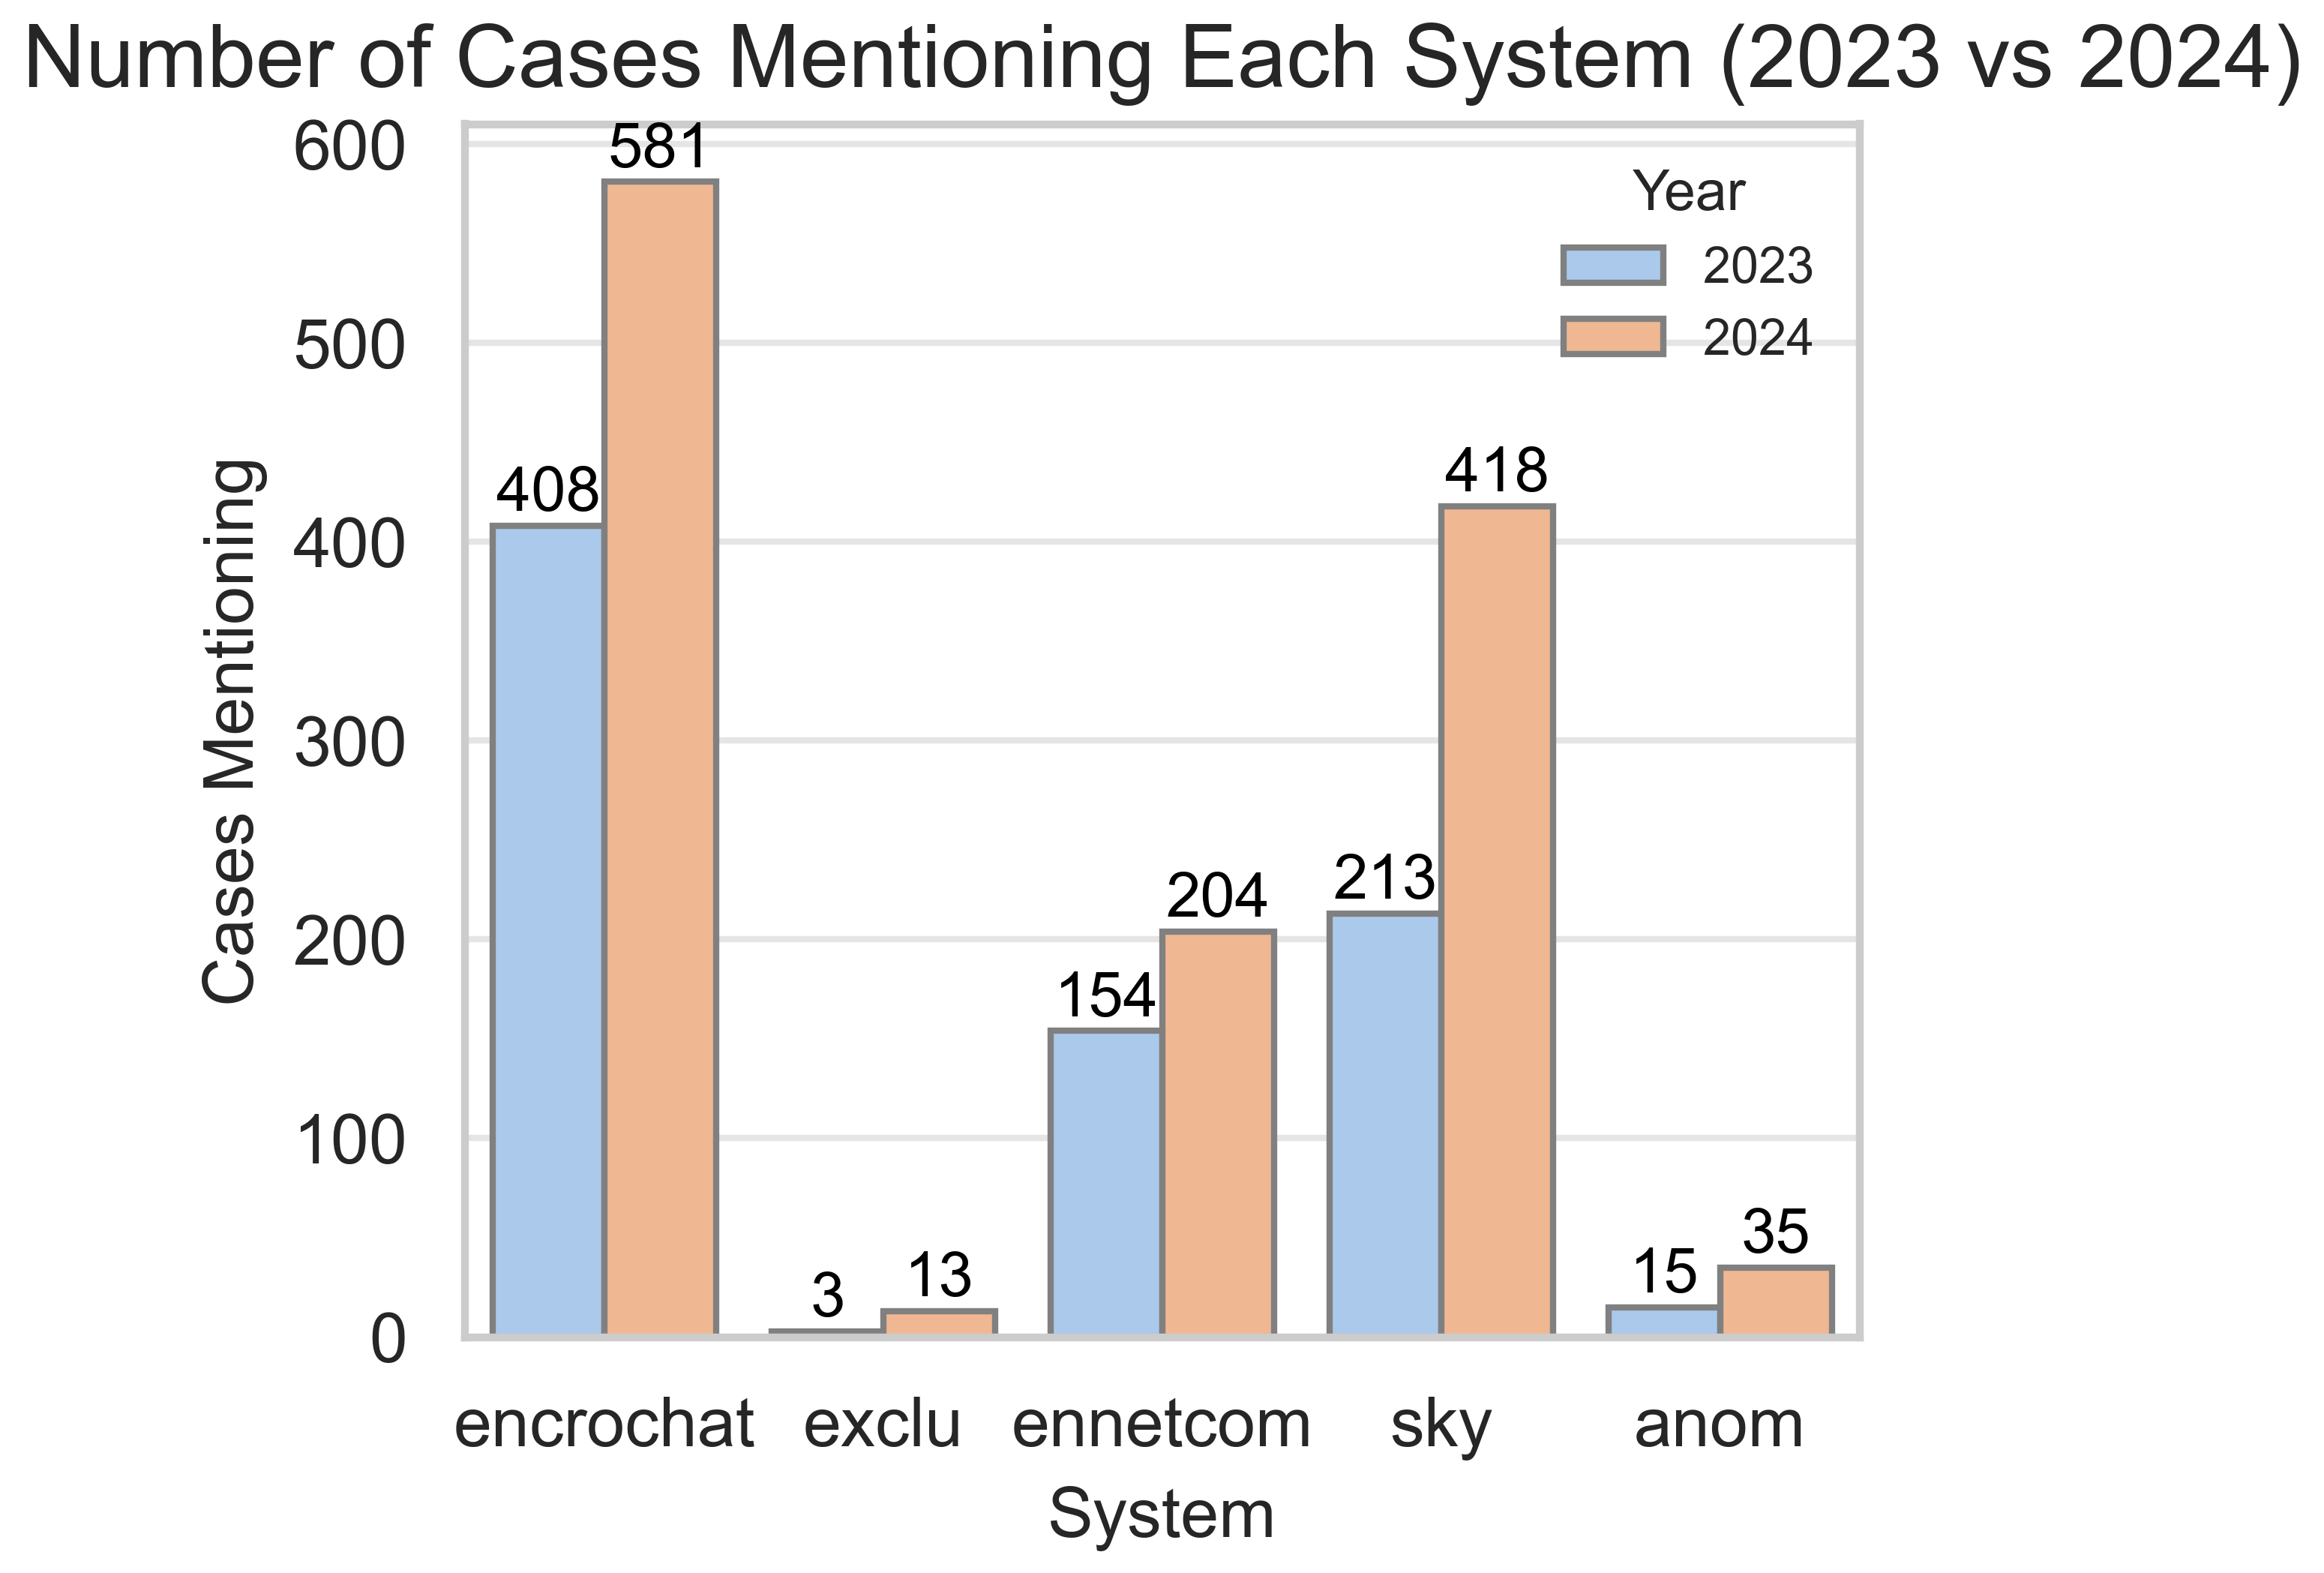

In [120]:
# Visualize the cases mentioning the term for 2023 and 2024
visualize_cases_mentioning(stats_23, stats_24)

In [59]:
def most_mentioned(row, crypto_cols):
    max_mentions = row[crypto_cols].max()
    # If there's a tie, prioritize 'encrochat'
    if max_mentions == row['encrochat']:
        return 'encrochat', row['encrochat']
    # Otherwise, find the system with the most mentions
    for system in crypto_cols:
        if row[system] == max_mentions:
            return system, max_mentions
    return None, 0  # Default case if no mentions



In [60]:
def extract_year_from_ecli(ecli):
    parts = ecli.split(':')
    # fourth part is the year
    return parts[3] if len(parts) > 3 else None

In [61]:
extract_year_from_ecli('ECLI:NL:RBDHA:2020:1234')

'2020'

In [62]:
# Apply the function to the data to determine the most mentioned system per case
data_23['most_mentioned_system'], data_23['most_mentions'] = zip(*data_23.apply(most_mentioned, axis=1, crypto_cols=cols))
data_23['year'] = data_23['ecli'].apply(extract_year_from_ecli)
data_23['straf_in_dagen'] = data_23['straf_in_dagen'].replace('nan', 0)
data_23['straf_in_dagen'] = data_23['straf_in_dagen'].astype(float).astype(int)


In [63]:
data_24['most_mentioned_system'], data_24['most_mentions'] = zip(*data_24.apply(most_mentioned, axis=1, crypto_cols=cols))
data_24['year'] = data_24['ecli'].apply(extract_year_from_ecli)
data_24['straf_in_dagen'] = data_24['straf_in_dagen'].replace('nan', 0)
data_24['straf_in_dagen'] = data_24['straf_in_dagen'].astype(float).astype(int)

In [64]:

data_24.head()

,encrochat,exclu,ennetcom,sky,anom,ecli,zaaknummer,rechtbank,rechtsgebied,soort uitspraak,...,straf_periode,straf_aantal,straf_in_dagen,vw_straf_periode,vw_straf_aantal,vw_straf_in_dagen,vrijspraak,most_mentioned_system,most_mentions,year
0,1,0,0,0,0,ecli:nl:rbmne:2023:1595,16/133355-21 (ontneming),rechtbank midden-nederland,strafrecht,eerste aanleg - meervoudig,...,nan,nan,0,nan,nan,nan,nan,encrochat,1,2023
1,1,0,0,0,0,ecli:nl:rbove:2024:1915,08.963573-21 (p),rechtbank overijssel,strafrecht,eerste aanleg - meervoudig,...,maand,97,2910,nan,nan,nan,nan,encrochat,1,2024
2,0,0,0,2,0,ecli:nl:rbgel:2023:5422,05.323470.22,rechtbank gelderland,strafrecht,eerste aanleg - meervoudig,...,jaar,4.5,1642,nan,nan,nan,nan,sky,2,2023
3,0,0,0,0,0,ecli:nl:rbzwb:2024:1254,02-133243-23,rechtbank zeeland-west-brabant,strafrecht,op tegenspraak,...,nan,nan,0,nan,nan,nan,nan,encrochat,0,2024
4,121,0,0,0,0,ecli:nl:rblim:2022:558,03.271177.20 en 03.135736.20,rechtbank limburg,strafrecht,eerste aanleg - meervoudig,...,maand,42,1260,nan,nan,nan,nan,encrochat,121,2022


In [65]:
data_23.head()

,encrochat,exclu,ennetcom,sky,anom,ecli,zaaknummer,rechtbank,rechtsgebied,soort uitspraak,...,straf_periode,straf_aantal,straf_in_dagen,vw_straf_periode,vw_straf_aantal,vw_straf_in_dagen,vrijspraak,most_mentioned_system,most_mentions,year
0,1,0,0,0,0,ecli:nl:rbmne:2023:1595,16/133355-21 (ontneming),rechtbank midden-nederland,strafrecht,eerste aanleg - meervoudig,...,nan,nan,0,nan,nan,nan,nan,encrochat,1,2023
1,121,0,0,0,0,ecli:nl:rblim:2022:558,03.271177.20 en 03.135736.20,rechtbank limburg,strafrecht,eerste aanleg - meervoudig,...,maand,42,1260,nan,nan,nan,nan,encrochat,121,2022
2,18,0,0,0,0,ecli:nl:rbdha:2022:7667,09-278272-21,rechtbank den haag,strafrecht,eerste aanleg - meervoudig,...,maand,42,1260,nan,nan,nan,nan,encrochat,18,2022
3,1,0,0,0,0,ecli:nl:gharl:2023:1759,21-002300-22,gerechtshof arnhem-leeuwarden,strafrecht,hoger beroep,...,week,4,28,nan,nan,nan,nan,encrochat,1,2023
4,2,0,0,1,0,ecli:nl:rbmne:2021:3965,16/257655-20 (p),rechtbank midden-nederland,strafrecht,eerste aanleg - meervoudig,...,jaar,6,2190,nan,nan,nan,nan,encrochat,2,2021


In [84]:
data_23['most_mentioned_system'].value_counts()

encrochat    385
ennetcom     120
sky          114
anom           7
exclu          2
Name: most_mentioned_system, dtype: int64

In [85]:
data_23['year'].value_counts()

2022    304
2021    169
2023     95
2020     30
2019     16
2016      7
2018      6
2013      1
Name: year, dtype: int64

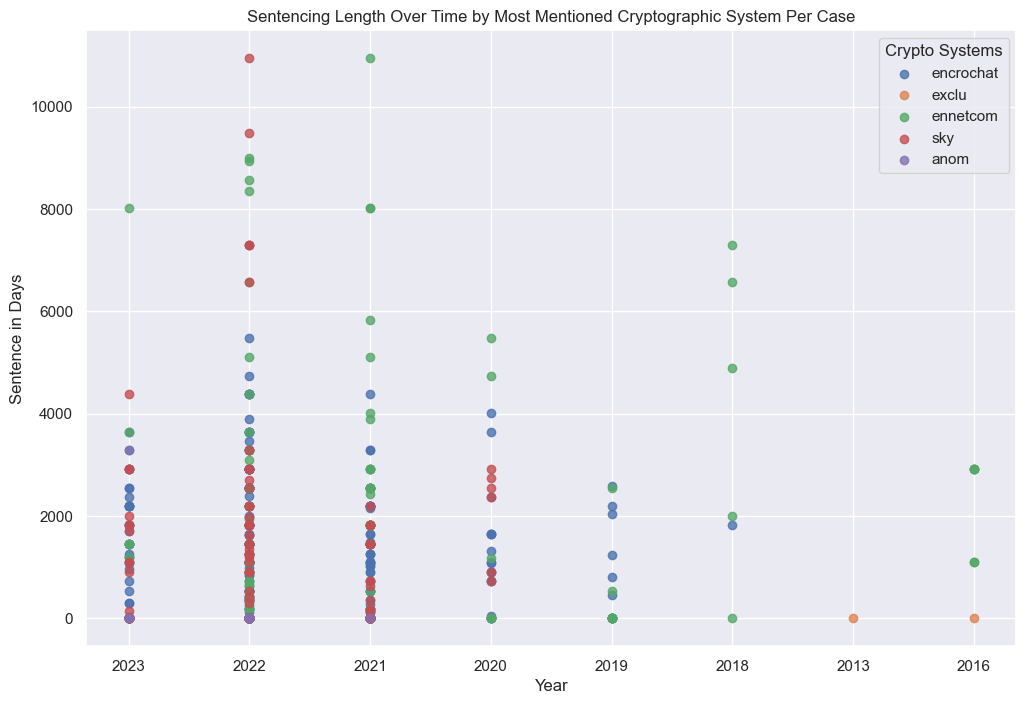

In [90]:
plt.figure(figsize=(12, 8))


# wrap the code in function 
def plot_sentencing_length(data, cols):
    """
    Plot the sentencing length over time for the most mentioned cryptographic system in each case.

    Parameters:
        data (DataFrame): The dataset containing information about cases and the most mentioned system.
        cols (list): A list of columns representing different cryptographic systems.

    Displays:
        A scatter plot of sentencing length over time for each most mentioned cryptographic system.
    """
    plt.figure(figsize=(12, 8))
    for system in cols:
        # Filter cases for each system
        subset = data[data['most_mentioned_system'] == system]
        plt.scatter(subset['year'], subset['straf_in_dagen'], label=system, alpha=0.8)

    plt.title('Sentencing Length Over Time by Most Mentioned Cryptographic System Per Case')
    plt.xlabel('Year')
    plt.ylabel('Sentence in Days')
    plt.legend(title='Crypto Systems')
    plt.grid(True)
    plt.show()

# for system in cols:
#     # Filter cases for each system
#     subset = data_23[data_23['most_mentioned_system'] == system]
#     plt.scatter(subset['year'], subset['straf_in_dagen'], label=system, alpha=0.8)

# plt.title('Sentencing Length Over Time by Most Mentioned Cryptographic System Per Case')
# plt.xlabel('Year')
# plt.ylabel('Sentence in Days')
# plt.legend(title='Crypto Systems')
# plt.grid(True)


# # Show the plot
# plt.show()

In [66]:
# concat both dataframes and only keep unique rows based on ecli
data_ALL = pd.concat([data_23, data_24]).drop_duplicates(subset=['ecli'])

In [68]:
box_plot_data = (data_ALL.groupby(['year', 'most_mentioned_system'])['straf_in_dagen']
                 .agg(list)
                 .reset_index())

In [69]:
box_plot_data

,year,most_mentioned_system,straf_in_dagen
0,2013,exclu,[0]
1,2016,ennetcom,"[1095, 2920, 2920, 2920, 1095, 2920]"
2,2016,exclu,[0]
3,2018,encrochat,[1825]
4,2018,ennetcom,"[7300, 2005, 4895, 0, 6570]"
5,2019,encrochat,"[810, 2580, 2040, 2190, 1230, 450, 0, 0, 0]"
6,2019,ennetcom,"[0, 0, 0, 540, 2555, 0, 0]"
7,2020,encrochat,"[1320, 720, 4015, 3650, 42, 1642, 720, 0, 0, 1..."
8,2020,ennetcom,"[4745, 0, 1170, 0, 5475, 0, 0]"
9,2020,sky,"[2555, 900, 2920, 2370, 720, 2735]"


In [95]:
box_plot_data = box_plot_data.explode('straf_in_dagen')
box_plot_data.sort_values('year', inplace=True)

In [107]:
# remove the row for year 2013, 2016 and 2018
box_plot_data = box_plot_data[box_plot_data['year'] != '2013']
box_plot_data = box_plot_data[box_plot_data['year'] != '2016']
box_plot_data = box_plot_data[box_plot_data['year'] != '2018']

In [109]:
# remove the mentioned system for the given year if the sentence is 0 and its the only occurence for that year
box_plot_data = box_plot_data[(box_plot_data['straf_in_dagen'] != 0) | (box_plot_data['straf_in_dagen'].duplicated())]

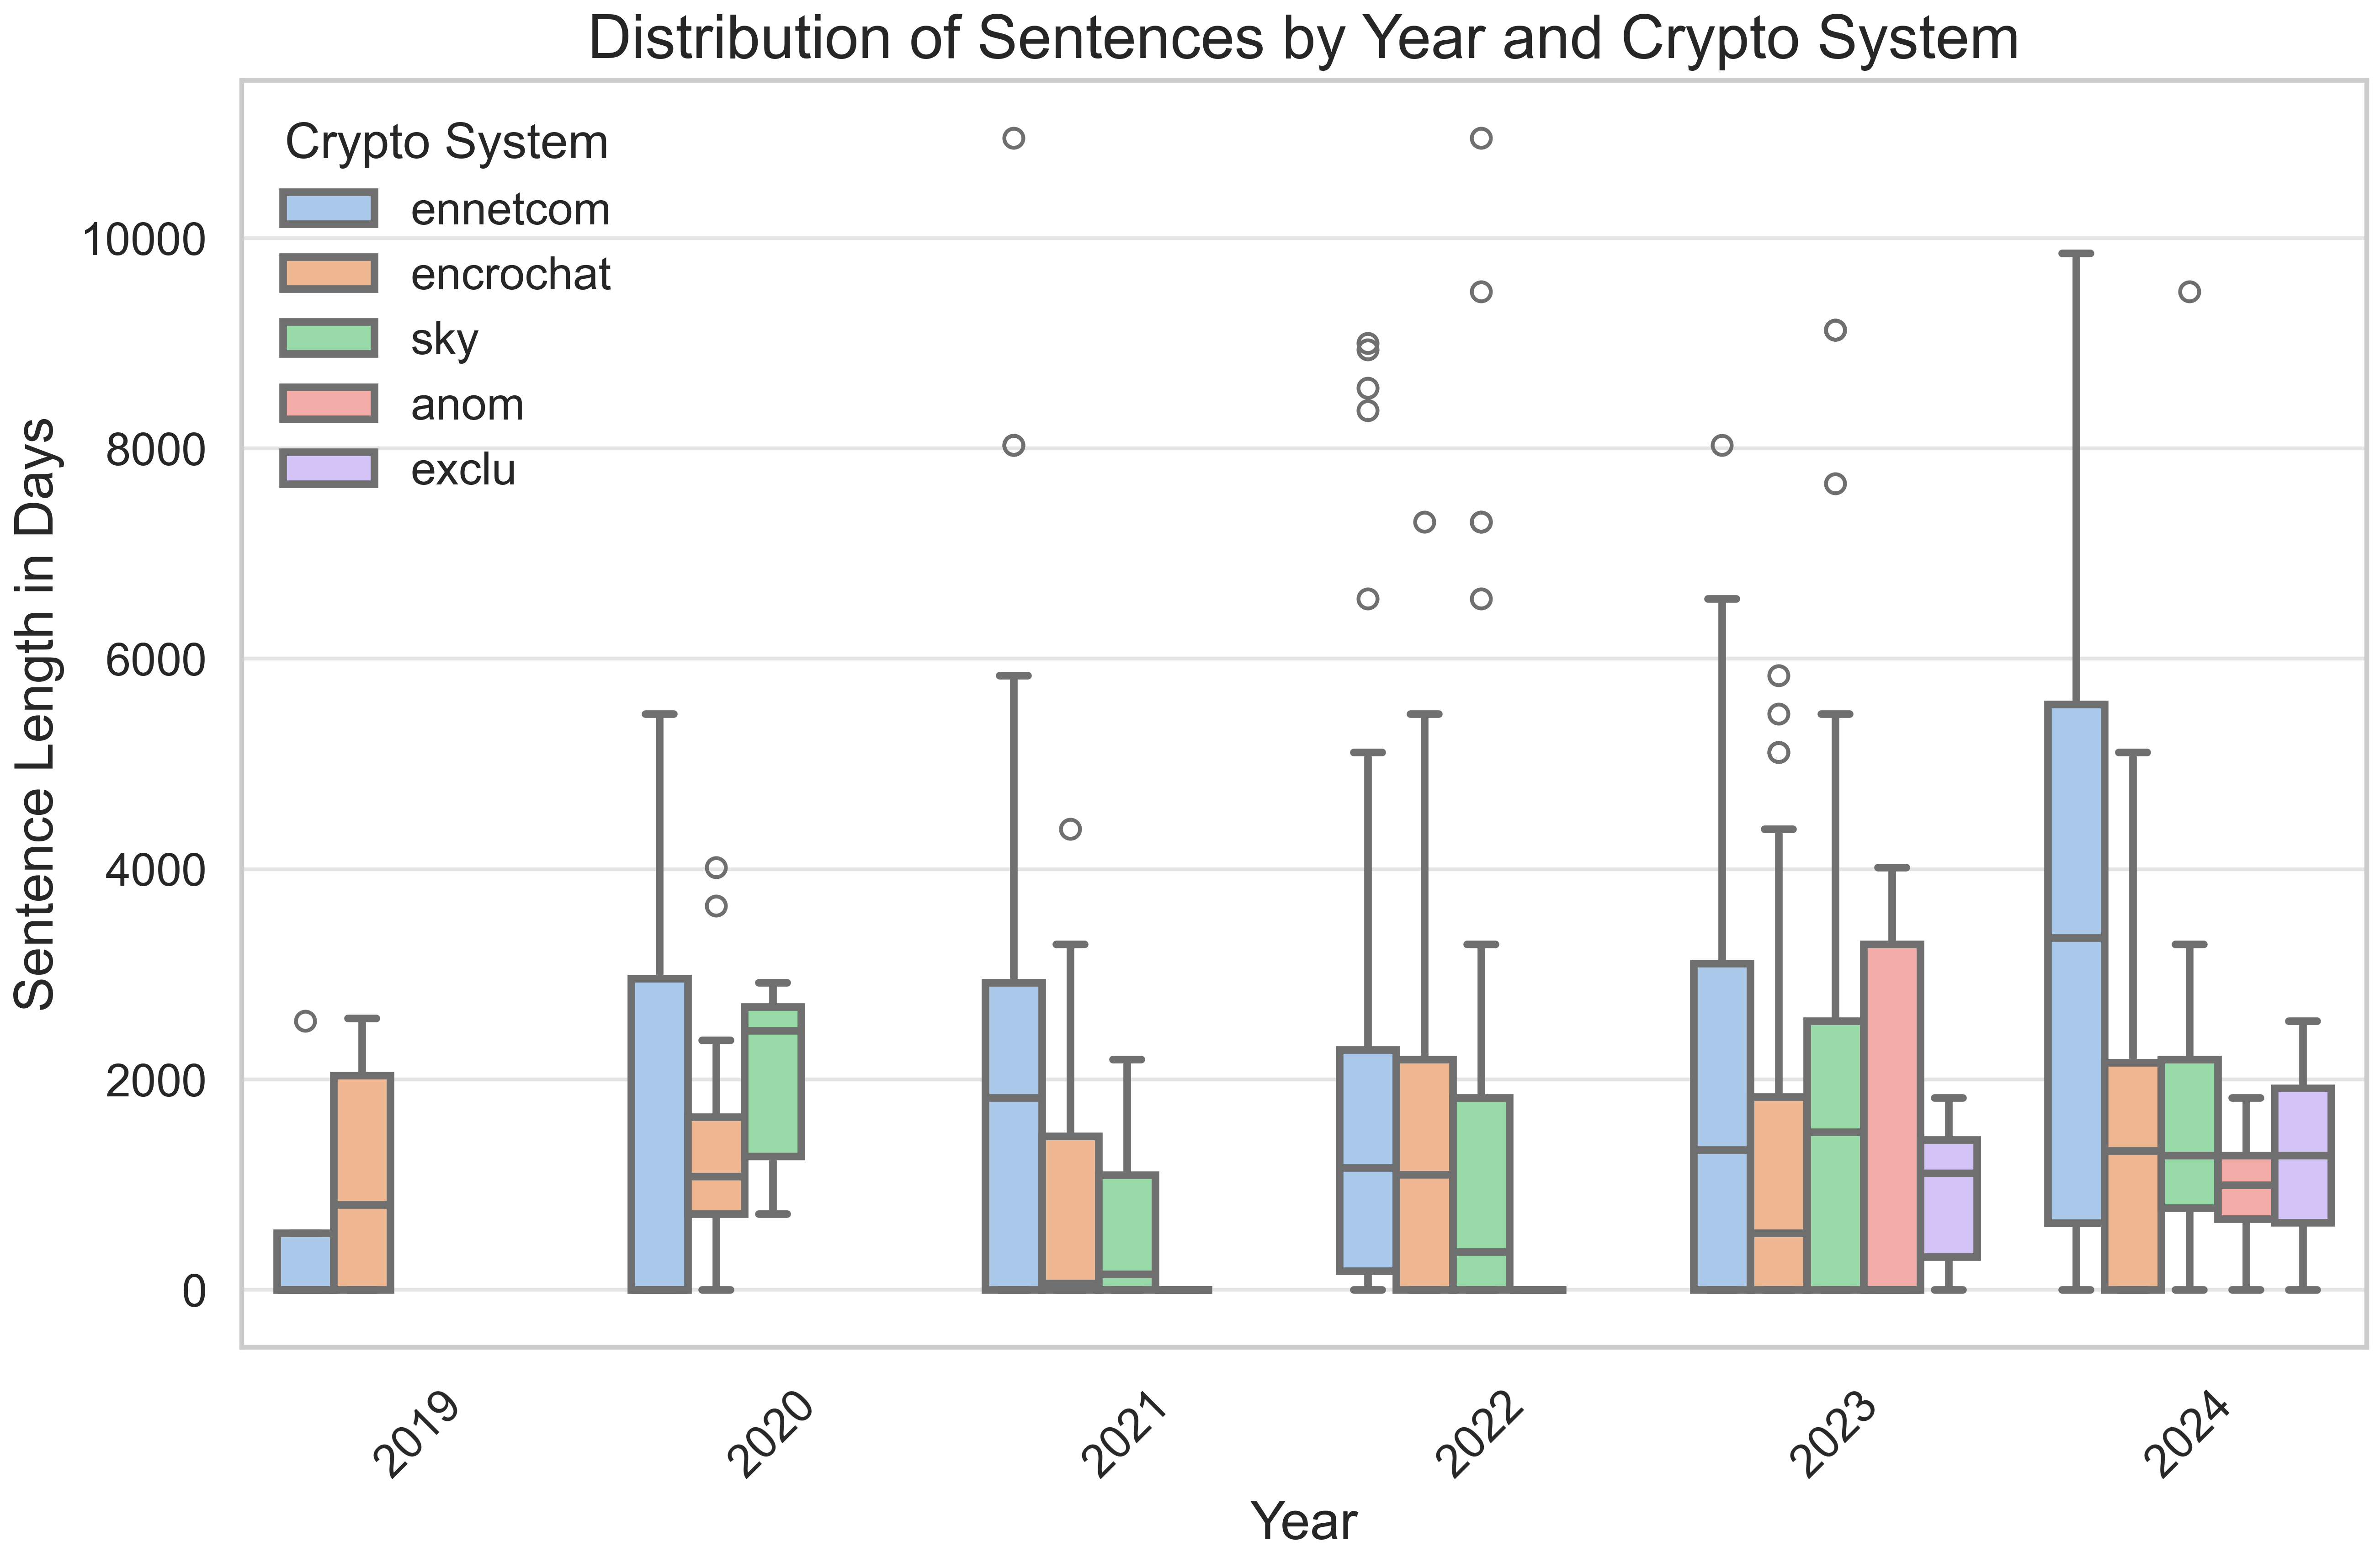

In [110]:
plt.figure(figsize=(10, 6))  # Adjusted size for clarity
sns.set(style="whitegrid")  # Professional style suitable for academic publication

# Create the box plot
boxplot = sns.boxplot(x='year', y='straf_in_dagen', hue='most_mentioned_system', data=box_plot_data, palette="pastel", fliersize=5, linewidth=2)
plt.title('Distribution of Sentences by Year and Crypto System', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sentence Length in Days', fontsize=14)
plt.xticks(fontsize=12, rotation=45)  # Rotate for better label visibility if needed
plt.yticks(fontsize=12)
plt.legend(title='Crypto System', fontsize=12, title_fontsize='13')

plt.show()

C:\UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  lineplot = sns.lineplot(x='year', y='cumulative_sum', data=aggregated_data, marker='o', linewidth=2, palette="pastel")


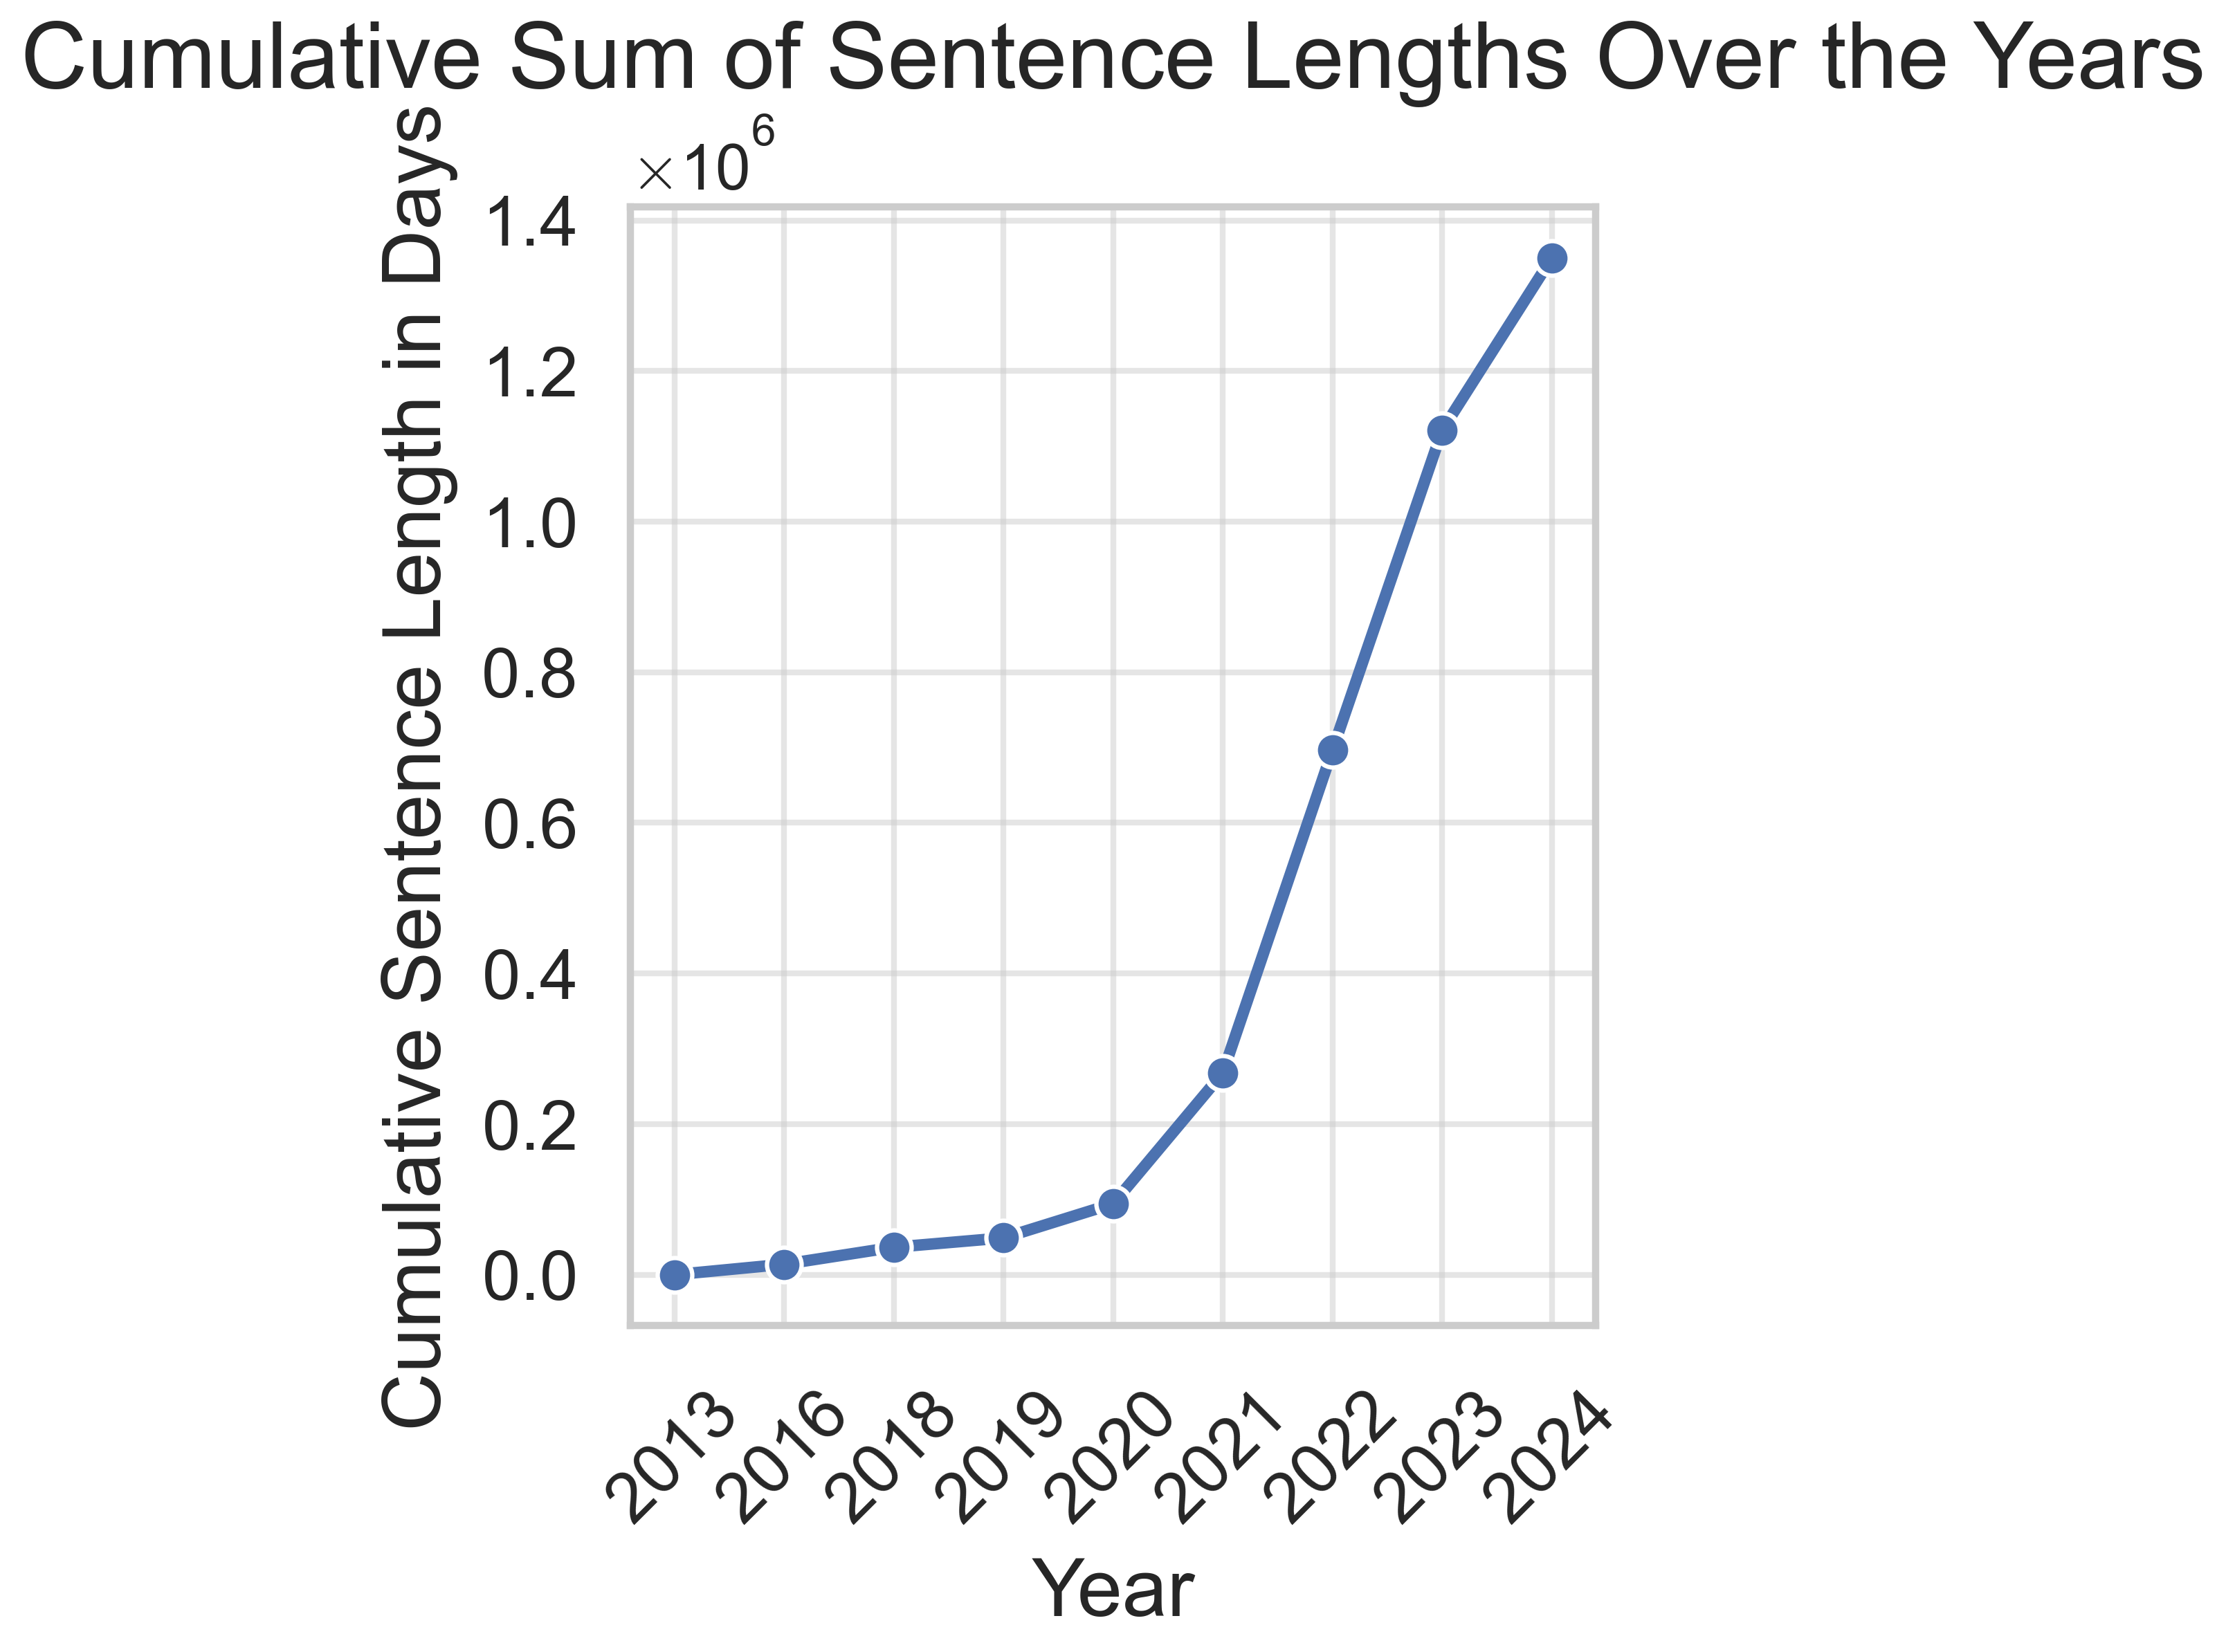

In [114]:


aggregated_data = data_ALL.groupby('year')['straf_in_dagen'].sum().reset_index()

# Calculate the cumulative sum
aggregated_data['cumulative_sum'] = aggregated_data['straf_in_dagen'].cumsum()

# Creating the plot
plt.figure(figsize=(3, 3.5))  
sns.set(style="whitegrid")  

# Create the line plot
lineplot = sns.lineplot(x='year', y='cumulative_sum', data=aggregated_data, marker='o', linewidth=2, palette="pastel")
plt.title('Cumulative Sum of Sentence Lengths Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cumulative Sentence Length in Days', fontsize=14)
plt.xticks(fontsize=12, rotation=45)  
plt.yticks(fontsize=12)

plt.show()


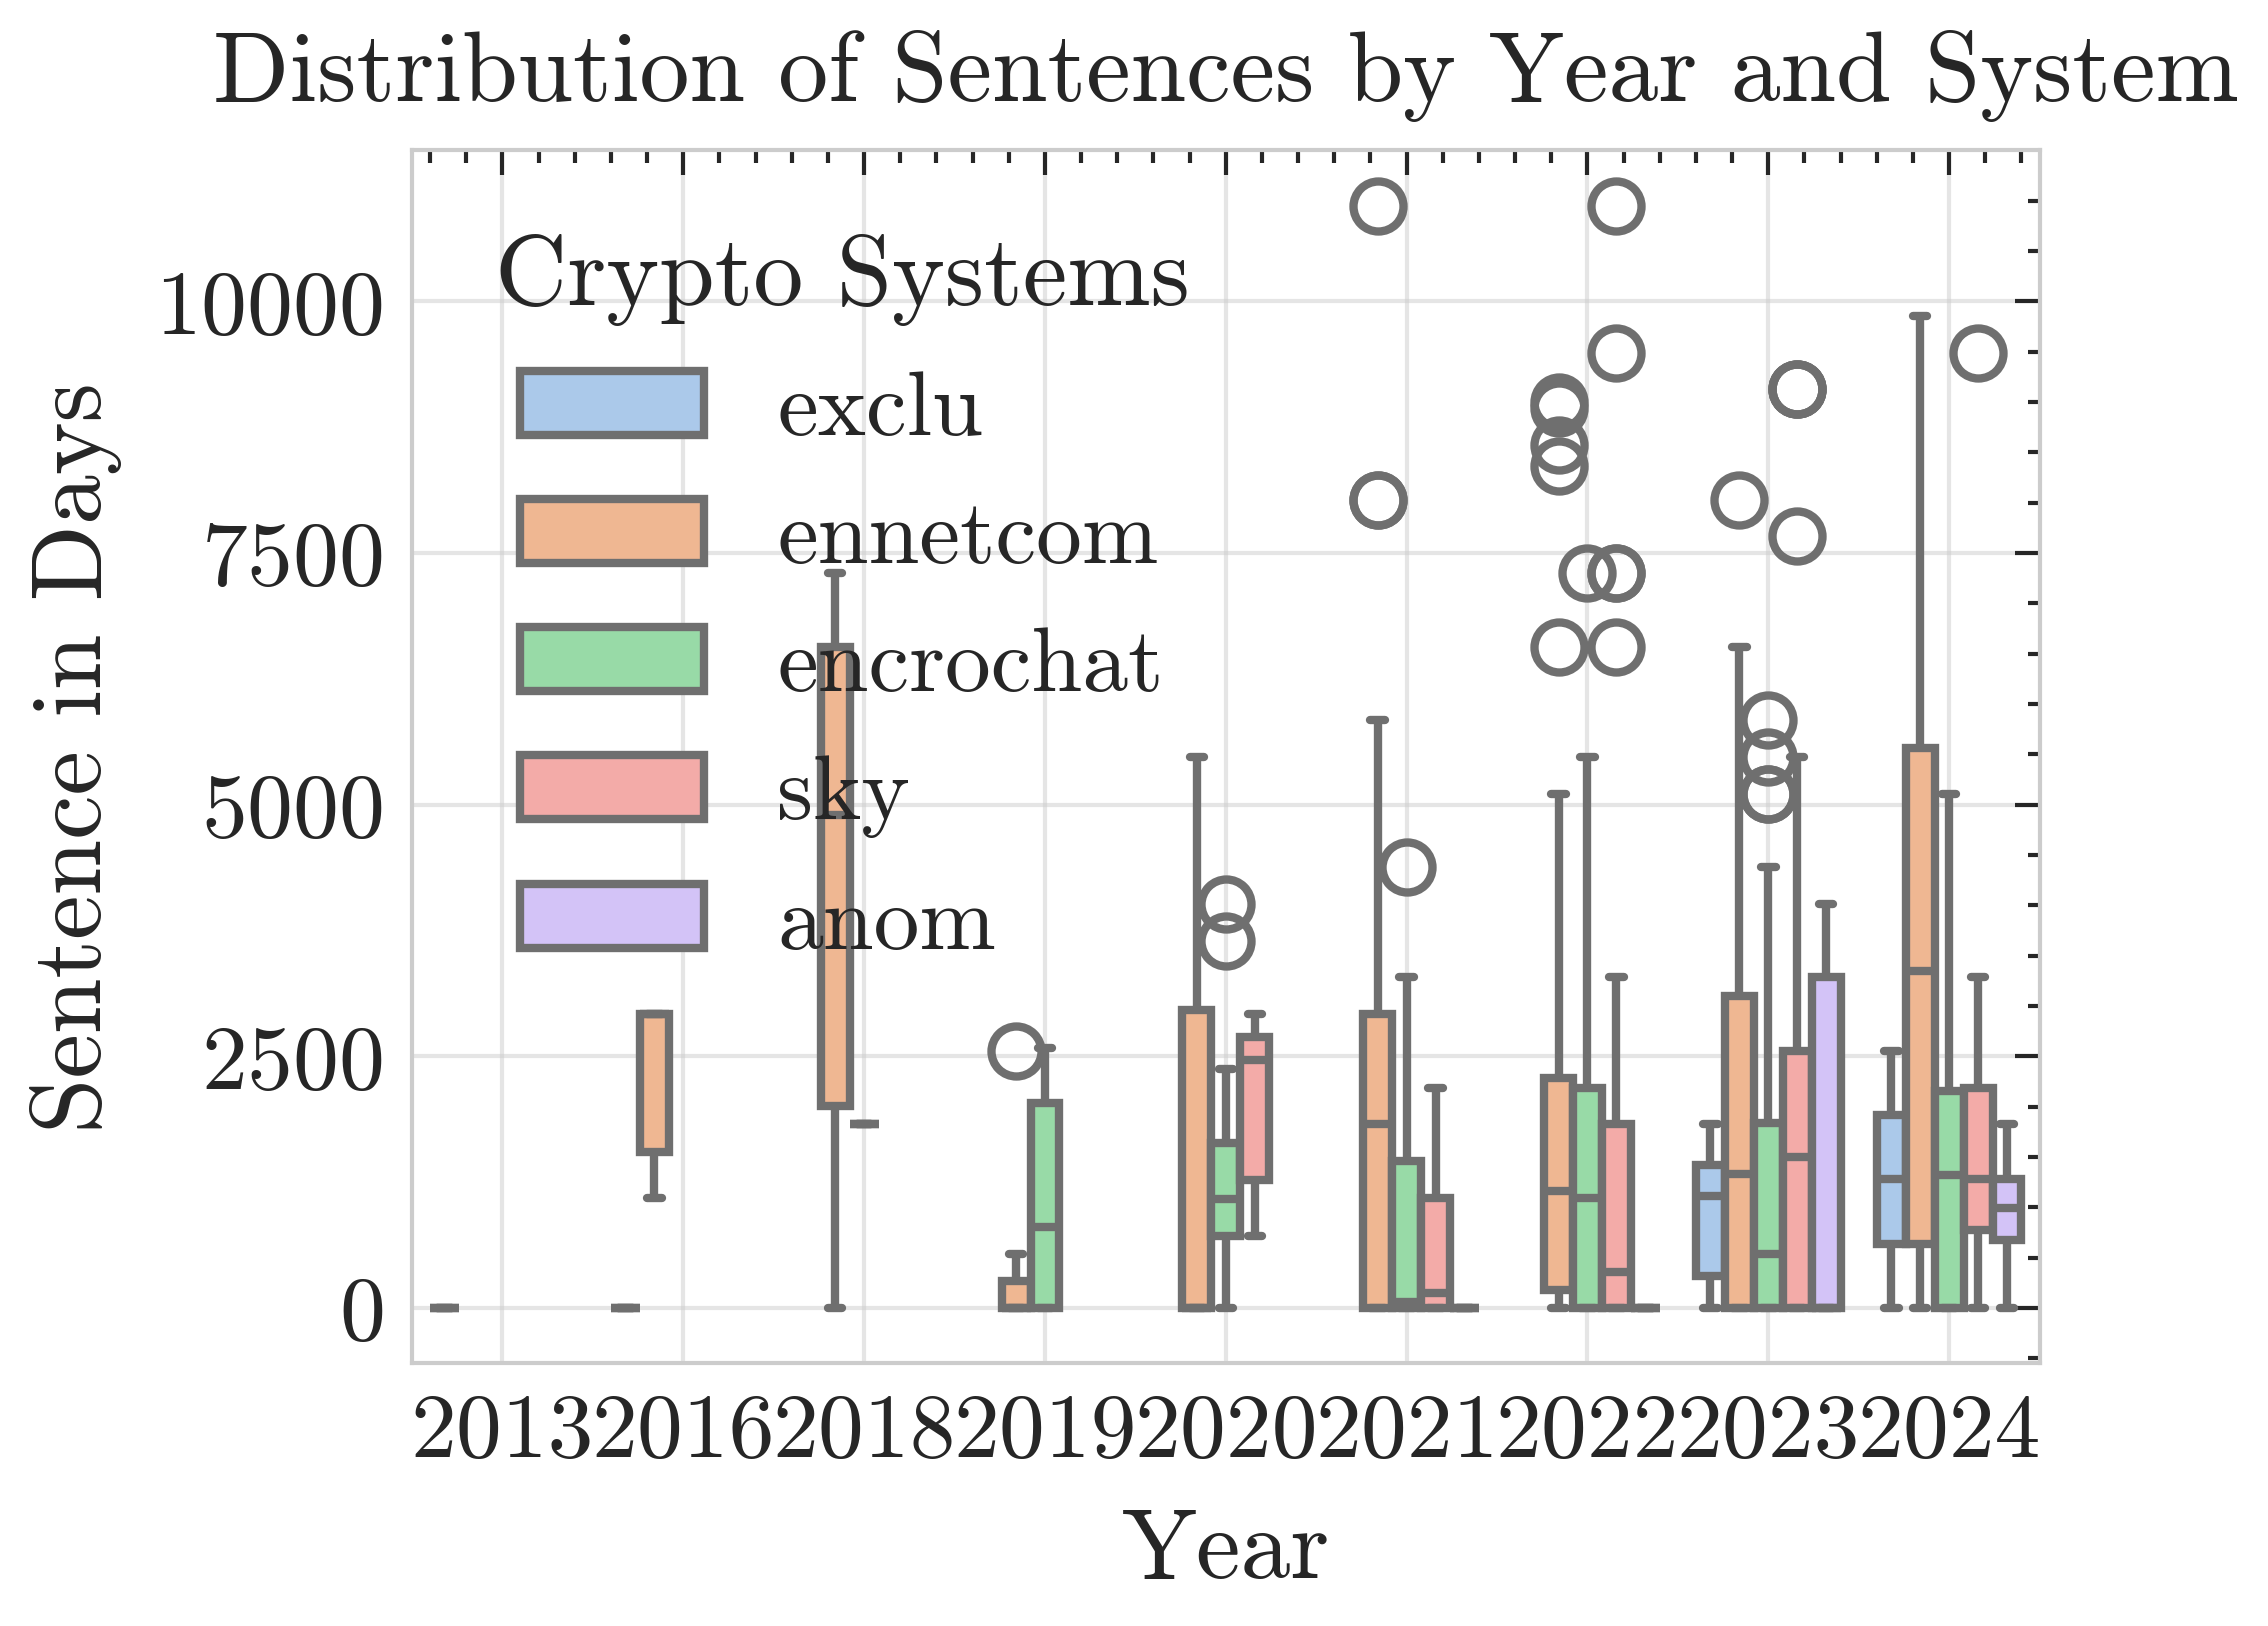

<Figure size 12000x4800 with 0 Axes>

In [94]:
# Create the box plot
sns.boxplot(x='year', y='straf_in_dagen', hue='most_mentioned_system', data=box_plot_data, palette='pastel')
plt.title('Distribution of Sentences by Year and System')
plt.ylabel('Sentence in Days')
plt.xlabel('Year')
plt.legend(title='Crypto Systems')
plt.grid(True)

#ajdust figure size
plt.figure(figsize=(20, 8))

plt.style.use(['science','no-latex'])
# Show the plot
plt.show()

rechtbank amsterdam                     154
rechtbank rotterdam                      74
rechtbank den haag                       51
rechtbank zeeland-west-brabant           41
rechtbank overijssel                     40
rechtbank oost-brabant                   40
rechtbank midden-nederland               39
rechtbank gelderland                     35
rechtbank noord-holland                  32
rechtbank limburg                        30
gerechtshof arnhem-leeuwarden            21
parket bij de hoge raad                  17
gerechtshof amsterdam                    16
rechtbank noord-nederland                16
gerechtshof den haag                     11
gerechtshof 's-hertogenbosch              5
gerecht in eerste aanleg van curaçao      4
hoge raad                                 2
Name: rechtbank, dtype: int64

In [155]:
# calculate the average sentence length for each court
court_avg_sentence = data_23.groupby('rechtbank')['straf_in_dagen'].mean().sort_values(ascending=False)
court_avg_sentence

rechtbank
gerecht in eerste aanleg van curaçao    2712.500000
gerechtshof amsterdam                   2597.187500
rechtbank gelderland                    2425.142857
gerechtshof arnhem-leeuwarden           2047.857143
rechtbank midden-nederland              1603.974359
rechtbank den haag                      1393.431373
rechtbank zeeland-west-brabant          1271.585366
rechtbank amsterdam                     1221.136364
rechtbank noord-nederland               1211.125000
rechtbank overijssel                    1120.500000
rechtbank noord-holland                 1022.343750
rechtbank oost-brabant                   999.375000
rechtbank rotterdam                      973.472973
gerechtshof den haag                     750.000000
rechtbank limburg                        468.266667
gerechtshof 's-hertogenbosch             401.000000
parket bij de hoge raad                  214.705882
hoge raad                                  0.000000
Name: straf_in_dagen, dtype: float64

In [ ]:
cases_court = data_23['rechtbank'].value_counts()
cases_court

In [157]:
court_names = data_23['rechtbank'].unique()
court_names

array(['rechtbank midden-nederland', 'rechtbank limburg',
       'rechtbank den haag', 'gerechtshof arnhem-leeuwarden',
       'rechtbank gelderland', 'rechtbank amsterdam',
       'rechtbank rotterdam', 'rechtbank overijssel',
       'gerechtshof den haag', 'rechtbank noord-nederland',
       "gerechtshof 's-hertogenbosch", 'rechtbank oost-brabant',
       'rechtbank noord-holland', 'rechtbank zeeland-west-brabant',
       'parket bij de hoge raad', 'gerechtshof amsterdam', 'hoge raad',
       'gerecht in eerste aanleg van curaçao'], dtype=object)

C:\FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='rechtbank', y='straf_in_dagen', data=data_r, palette='pastel', legend=False, errorbar=None)


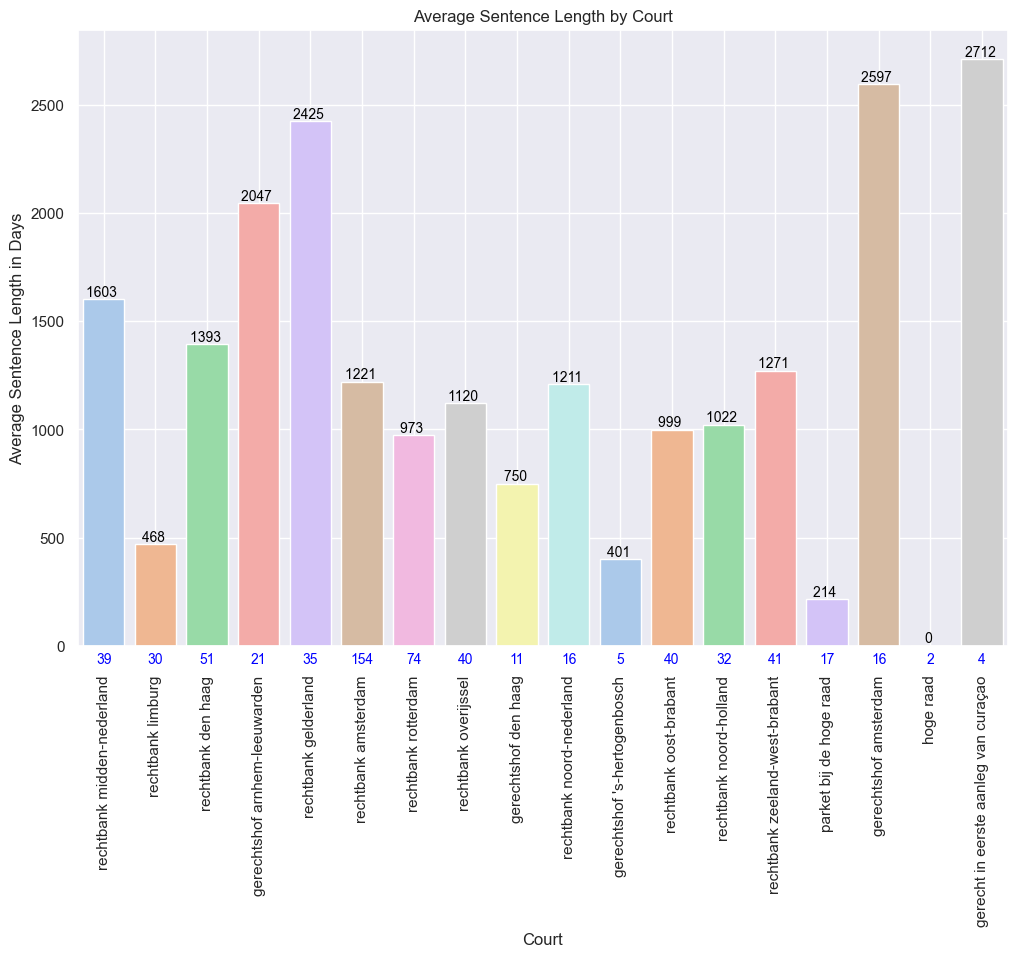

In [174]:
# plot the amount of cases per court and the average sentence length
# add the amount of cases per court to the bars

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='rechtbank', y='straf_in_dagen', data=data_23, palette='pastel', legend=False, errorbar=None)

for i, p in enumerate(ax.patches):
    height = p.get_height()
    court = p.get_x() + p.get_width() / 2.
    # Annotate the average sentence length
    ax.annotate(f'{int(height)} ', (court, height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    # Annotate the number of cases (using the court name)
    num_cases = cases_court[court_names[i]]
    ax.annotate(f'{num_cases}', (court, 0),
                ha='center', va='bottom', fontsize=10, color='blue', xytext=(0, -15),
                textcoords='offset points')



plt.title('Average Sentence Length by Court')
plt.xlabel('Court')
plt.ylabel('Average Sentence Length in Days')
plt.gca().tick_params(axis='x', which='major', pad=15)
plt.xticks(rotation=90)
plt.grid(True)